##Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Reading the dataset into pandas dataframe

In [ ]:
data= pd.read_csv("sample_data/heart_cleveland_upload.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

##Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X))

##Spliting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

##Logistic Regression from scratch 

###Helper function

In [ ]:
def accuracy(pred, test):
  correct=0
  for i in range(len(pred)):
    if(pred[i]==test[i]):
      correct=correct+1
  return float(correct)/len(pred)

  
def predict(thetha,b,test):
  return np.round_(1/(1+np.exp(-np.dot(thetha.T,test.T.to_numpy())-b)))

###Main function with gradient descent and without regularization

In [ ]:
def logisticRegression(iterations,learning_rate):
  m=X_train.shape[0]
  n=X_train.shape[1]

  x=X_train.T.to_numpy() #nxm
  Y=y_train.T.to_numpy() #1xm

  thetha=np.zeros((n,1)) #nx1
  b=0

  cost=[]

  for i in range(iterations):
    z=np.dot(thetha.T,x)+b #1xm
    hz=1/(1+np.exp(-z)) #1xm
    cost.append(np.mean( -Y*np.log(hz) - (1-Y)*np.log(1-hz) ))

    thetha=thetha-learning_rate*(((1/m)*np.dot(hz-Y , x.T)).T)
    b=b-learning_rate*np.mean(hz-Y)

  ax=plt.plot(cost)
  plt.xlabel("Iteration")
  plt.ylabel("Cost")  
  plt.show()
  return thetha,b

###**OUTPUT**

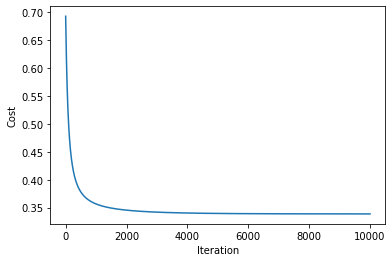

In [ ]:
thetha,b=logisticRegression(10000,0.01)

In [ ]:
thetha, b

(array([[-0.3031624 ],
        [ 0.6128296 ],
        [ 0.56960224],
        [ 0.53433733],
        [ 0.30145965],
        [-0.32573879],
        [ 0.14772997],
        [-0.61076002],
        [ 0.43445466],
        [ 0.31004477],
        [ 0.24061947],
        [ 1.34287531],
        [ 0.68505308]]), -0.07102955259408335)

In [ ]:
y_pred=predict(thetha,b,X_test)
accuracy(y_pred.tolist()[0],list(y_test.values.ravel()))

0.8666666666666667

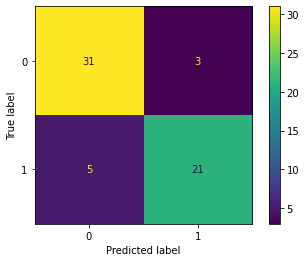

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(list(y_test.values.ravel()),y_pred.tolist()[0])
plt.show()

###With L2 Regularization

In [ ]:
def logisticRegressionL2(iterations,learning_rate,lamda):
  m=X_train.shape[0]
  n=X_train.shape[1]

  x=X_train.T.to_numpy() #nxm
  Y=y_train.T.to_numpy() #1xm

  thetha=np.zeros((n,1)) #nx1
  b=0

  cost=[]

  for i in range(iterations):
    z=np.dot(thetha.T,x)+b #1xm
    hz=1/(1+np.exp(-z)) #1xm
    cost.append(np.mean( -Y*np.log(hz) - (1-Y)*np.log(1-hz) ) + (lamda/(2*m))*np.sum(thetha**2))

    thetha=thetha-learning_rate*(((1/m)*np.dot(hz-Y , x.T)).T + (lamda/m)*thetha)
    b=b-learning_rate*(np.mean(hz-Y)) #+ (lamda/m)*b)

  ax=plt.plot(cost)
  plt.xlabel("Iteration")
  plt.ylabel("Cost")  
  plt.show()
  return thetha,b

###**OUTPUT**

###Setting Regularization Parameter to 0

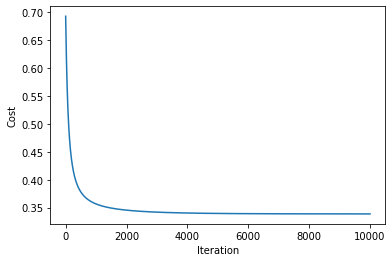

In [ ]:
thetha,b=logisticRegressionL2(10000,0.01,0)

In [ ]:
thetha,b

(array([[-0.3031624 ],
        [ 0.6128296 ],
        [ 0.56960224],
        [ 0.53433733],
        [ 0.30145965],
        [-0.32573879],
        [ 0.14772997],
        [-0.61076002],
        [ 0.43445466],
        [ 0.31004477],
        [ 0.24061947],
        [ 1.34287531],
        [ 0.68505308]]), -0.07102955259408335)

In [ ]:
y_pred=predict(thetha,b,X_test)
accuracy(y_pred.tolist()[0],list(y_test.values.ravel()))

0.8666666666666667

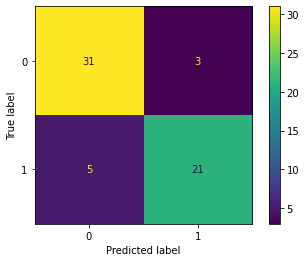

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(list(y_test.values.ravel()),y_pred.tolist()[0])
plt.show()

###Setting Regularization Parameter to 10

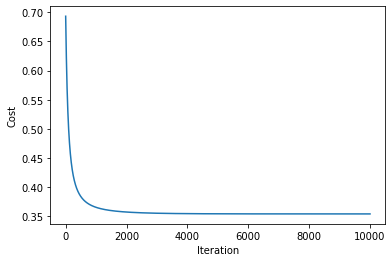

In [ ]:
thetha,b=logisticRegressionL2(10000,0.01,2)

In [ ]:
thetha,b

(array([[-0.20218693],
        [ 0.53414704],
        [ 0.52368108],
        [ 0.4395937 ],
        [ 0.24200634],
        [-0.25780675],
        [ 0.14538743],
        [-0.5274112 ],
        [ 0.40043635],
        [ 0.3172838 ],
        [ 0.20274059],
        [ 1.12644807],
        [ 0.64695005]]), -0.102491698665096)

In [ ]:
y_pred=predict(thetha,b,X_test)
accuracy(y_pred.tolist()[0],list(y_test.values.ravel()))

0.9

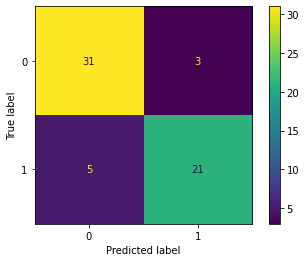

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(list(y_test.values.ravel()),y_pred.tolist()[0])
plt.show()

#Inbuild Logistic Regression

###Using LogisticRegression module

###Without Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty=None,max_iter=10000)
lr.fit(X_train,y_train.values.ravel())
y_pred=lr.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))



Accuracy:  0.8666666666666667


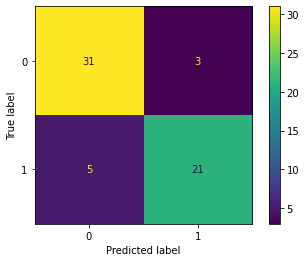

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,list(y_pred))
plt.show()

###With L2 Regularization

In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=10000)
lr.fit(X_train,y_train.values.ravel())
y_pred=lr.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.8666666666666667


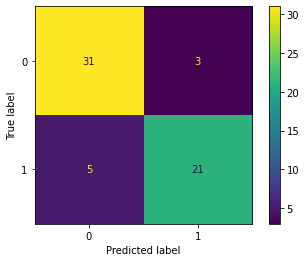

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,list(y_pred))
plt.show()

###Gradient Decent with log loss

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd=SGDClassifier(loss='log_loss', penalty=None, max_iter=10000,learning_rate='constant',eta0=0.01,shuffle=False,tol=None)
sgd.fit(X_train,y_train.values.ravel())
y_pred=sgd.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.8666666666666667


In [ ]:
sgd.coef_

array([[-0.31820921,  0.63034923,  0.57602568,  0.56694349,  0.29924738,
        -0.32015765,  0.14909049, -0.64747129,  0.43971823,  0.30961649,
         0.24561082,  1.37266849,  0.66881751]])

In [ ]:
sgd.intercept_

array([-0.05590031])

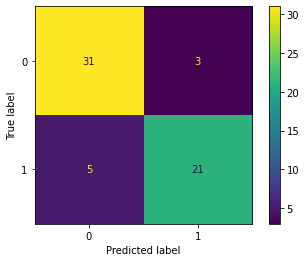

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,list(y_pred))
plt.show()

###With L2 Regularization

In [ ]:
sgdl2=SGDClassifier(loss='log_loss', penalty='l2',alpha= 0.01,max_iter=10000,learning_rate='constant',eta0=0.01,shuffle=False,tol=None)
sgdl2.fit(X_train,y_train.values.ravel())
y_pred=sgdl2.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9


In [ ]:
sgdl2.coef_

array([[-0.22397864,  0.68702786,  0.59077457,  0.69125654,  0.15537364,
        -0.20760998,  0.22612059, -0.79402898,  0.41955612,  0.46844915,
         0.22023615,  1.36059627,  0.51417755]])

In [ ]:
sgdl2.intercept_

array([-0.00517441])

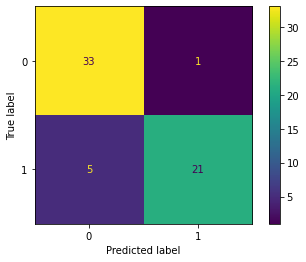

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,list(y_pred))
plt.show()